## 1. Comparing Quantile interpolation network with a set of several architectures

**Instruction :**

*   The output in each case includes text, density plots for the first trial (simulation and tranining) and the box plot constructing from 20 trails (re-simulation and re-training)
*   List of benchmarking models has:
  * Standard one-hidden-layer and one-output network which learns separately each quantile 
  * Two-hidden-layer and  one-output network which learns separately each quantile 
  * Multi-output (one-hidden-layer) network which learns jointly quantiles by summing-up all quantile losses
  * Qi net "simple" means the original idea of David but not a positive activation of output (increasing condition) and it learned from both (uniform) sampling alpha and targeting alphas (see more in section 2)
  * Qi net without "simple" defines a more complicated architecture
  * Notation "regular/ non regular" is whether the splitting rule of the interval alphas is regular or not. 




###a. low dim_X (= 10) - high alpha (= [0.85, 0.9, 0.95, 0.975])

Empirical probability of true label being lower than true VaR (alpha) =  [0.8495330810546875, 0.899993896484375, 0.9498291015625, 0.9744110107421875]
====== One hidden layer net ======
NRMSE in-sample VaR =  [0.17088939249515533, 0.18223892152309418, 0.21730543673038483, 0.2260572910308838]
NRMSE out-sample VaR =  [0.17078202962875366, 0.18094636499881744, 0.2175372838973999, 0.22672341763973236]
====== Two hidden layer net ======
NRMSE in-sample VaR =  [0.20199361443519592, 0.16362586617469788, 0.16677305102348328, 0.15973657369613647]
NRMSE out-sample VaR =  [0.19780437648296356, 0.16187644004821777, 0.16614781320095062, 0.15946970880031586]
====== Multi output net ======
NRMSE in-sample VaR =  [0.17160455882549286, 0.1801661103963852, 0.19397521018981934, 0.22550968825817108]
NRMSE out-sample VaR =  [0.17095427215099335, 0.18021123111248016, 0.19409394264221191, 0.2258496731519699]
====== Quantile interpolation net ( simple - non regular) ======
NRMSE in-sample VaR =  [0.16853569447

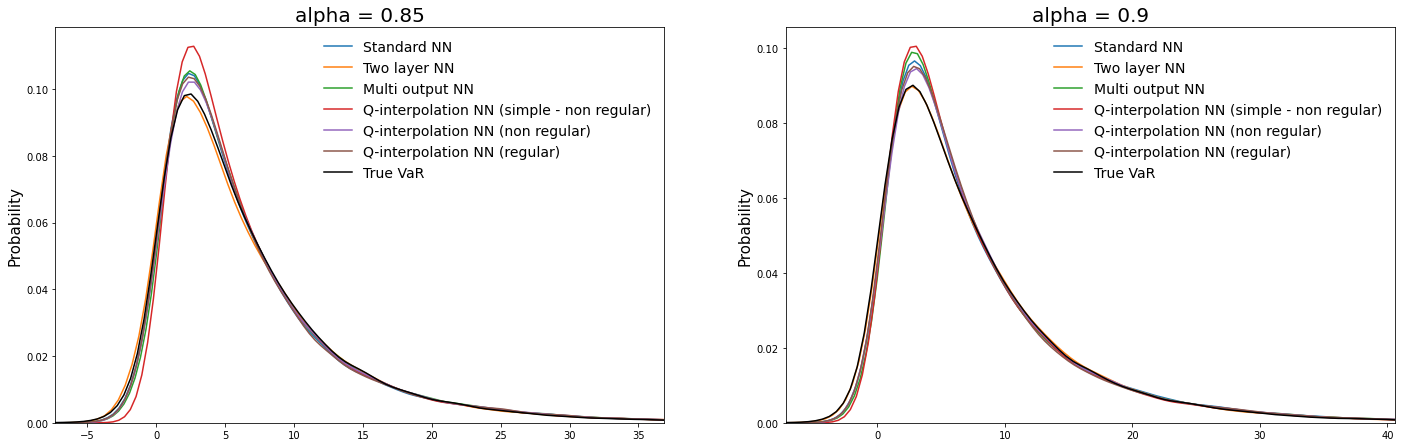

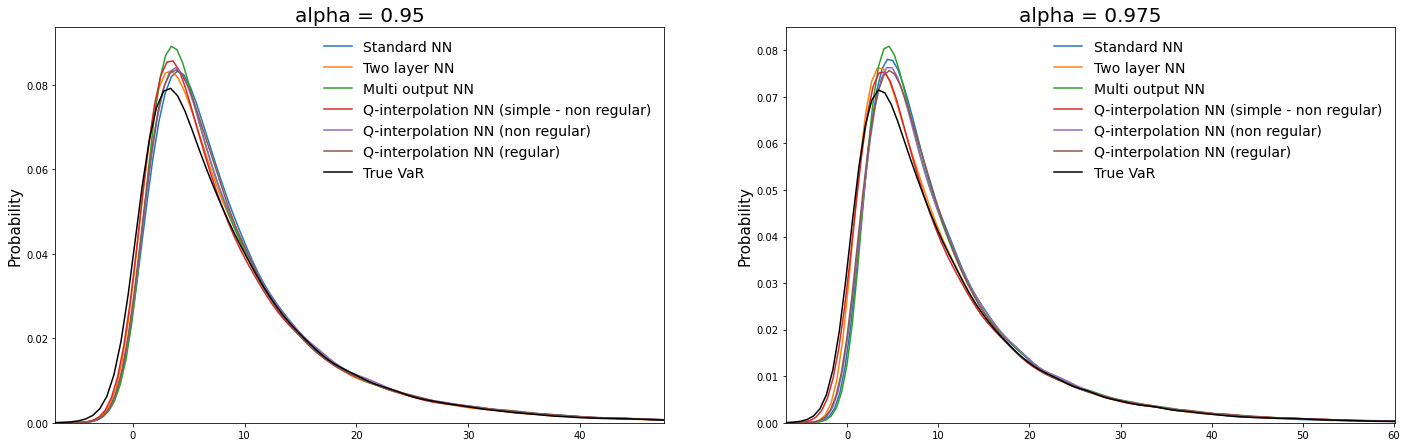

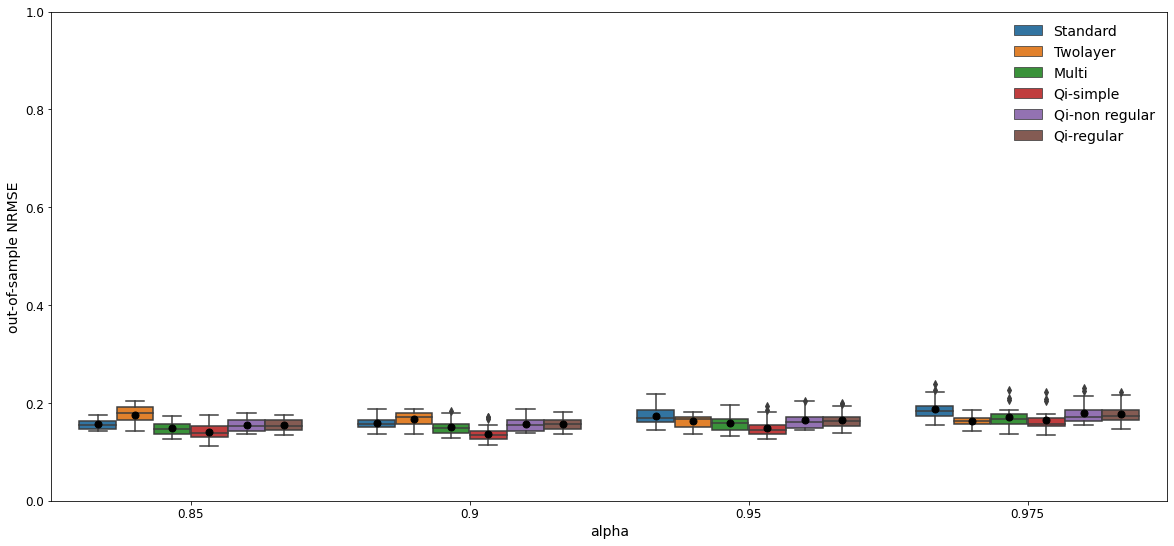

###b. high dim_X (= 40) - high alpha (= [0.85, 0.9, 0.95, 0.975])

Empirical probability of true label being lower than true VaR (alpha) =  [0.846893310546875, 0.897216796875, 0.94805908203125, 0.9741668701171875]
====== One hidden layer net ======
NRMSE in-sample VaR =  [0.24943768978118896, 0.22291572391986847, 0.2403978705406189, 0.26833996176719666]
NRMSE out-sample VaR =  [0.2462894469499588, 0.22453781962394714, 0.24107013642787933, 0.2682749330997467]
====== Two hidden layer net ======
NRMSE in-sample VaR =  [0.3468213975429535, 0.3677414059638977, 0.3062599301338196, 0.299454927444458]
NRMSE out-sample VaR =  [0.33011481165885925, 0.35081037878990173, 0.2916732728481293, 0.29379966855049133]
====== Multi output net ======
NRMSE in-sample VaR =  [0.24981537461280823, 0.2493751049041748, 0.256051242351532, 0.26492905616760254]
NRMSE out-sample VaR =  [0.24994957447052002, 0.24937503039836884, 0.2565702199935913, 0.2649366855621338]
====== Quantile interpolation net ( simple - non regular) ======
NRMSE in-sample VaR =  [0.19786736369132996, 0.197

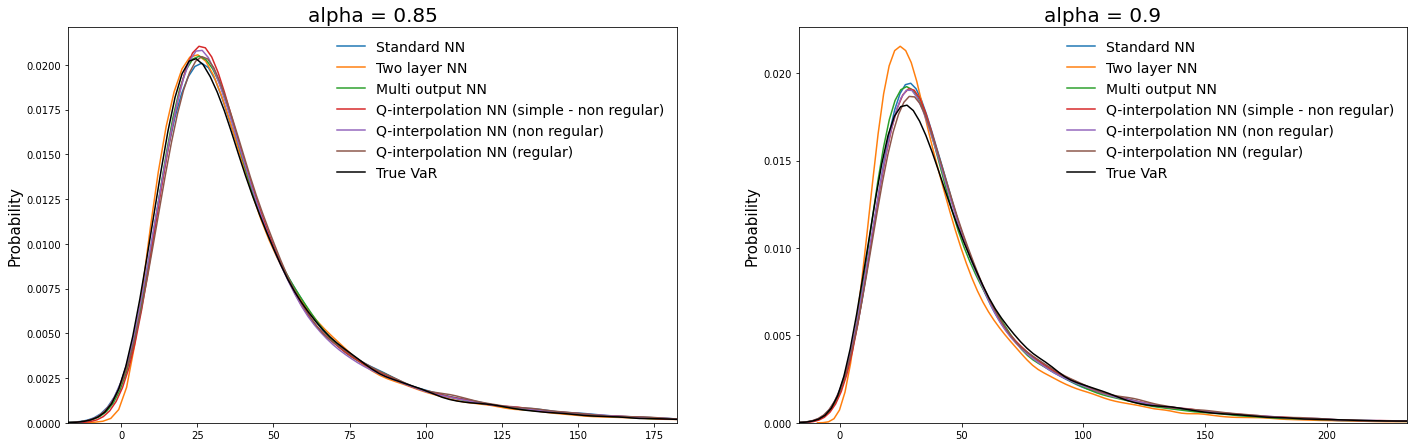

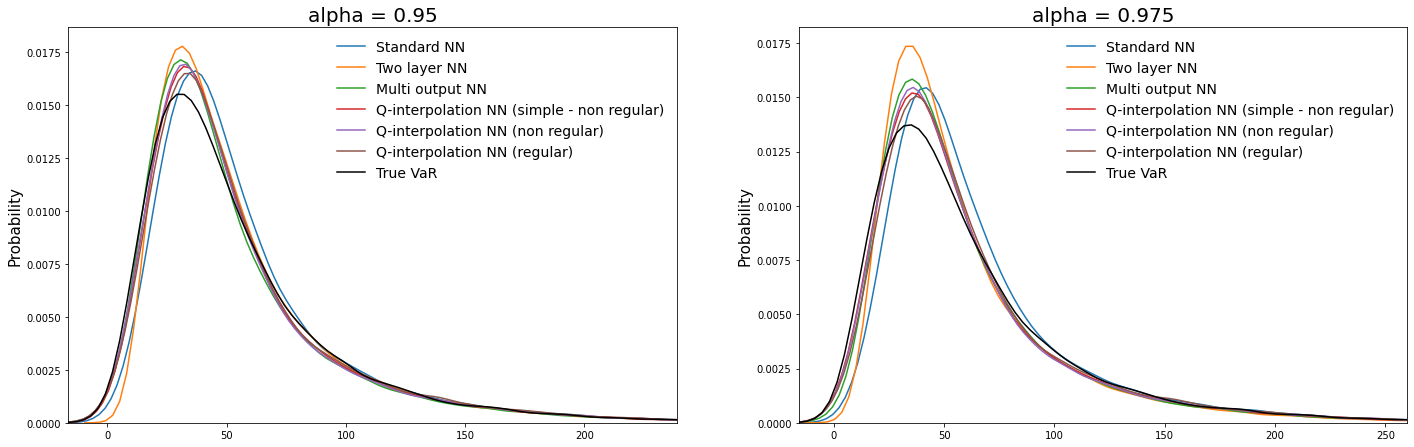

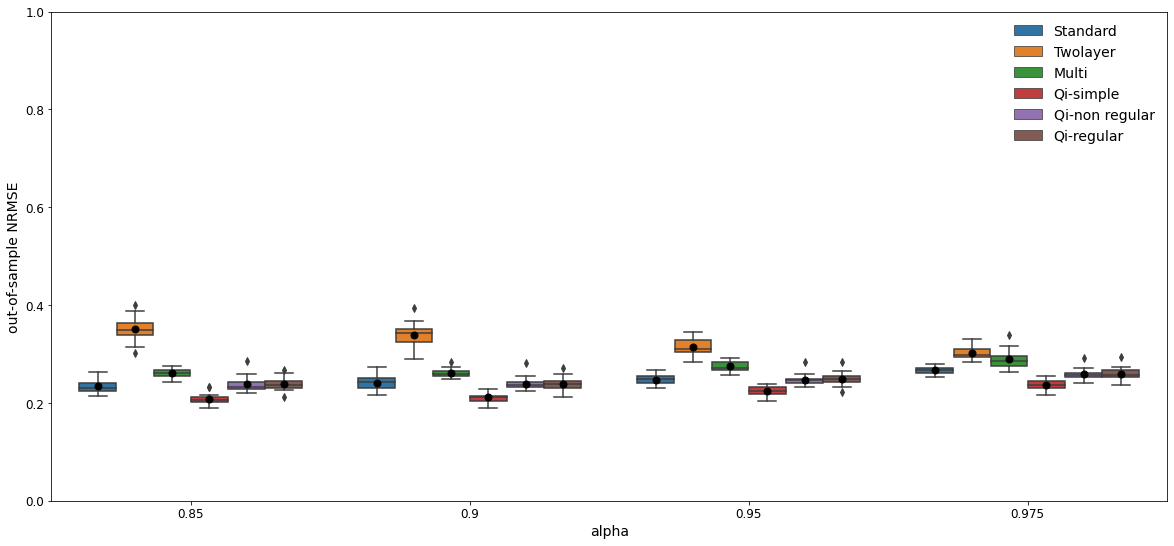

## 2. Comparing several training strategies for Qi net (simple)

**Instruction :**

* Qi net positive means that the architecture uses a positive activation for quantile increment (increasing condition)
* Without mentioning "sample alpha or alpha list", the architecture learns from both of them.
* More precisely, suppose a data set $\mathcal{D_n} = \{(x_i,y_i), i = 1\dots n\}$, we want to learn the conditional quantile of $Y|X$ at levels $\{\alpha_1, \dots,\alpha_K\}$. Let's denote the class of quantile interpolation net by, for $a,b \in [0,1]$ and $a \leq b$,
$$\mathcal{F} = \{R^d \times [a,b] \ni (x,\alpha) \to R\}$$

With $L(y,q)$ denoting quantile loss, the Qi net is trained by solving
* Using sample alpha
$$\arg\min_{f \in \mathcal{F}} \frac{1}{n}\sum_{i=1}^n L(y_i, f(x_i, \xi_i)) \hspace{1cm}\mbox{with  i.i.d }  \xi_i \sim Uniform(a,b)$$
* Using alpha list (targeting alphas)
$$\arg\min_{f \in \mathcal{F}} \frac{1}{n}\sum_{k = 1}^K\sum_{i=1}^n L(y_i, f(x_i, \alpha_k))$$
* Using sample alpha + alpha list (targeting alphas)
$$\arg\min_{f \in \mathcal{F}} \frac{1}{n}\sum_{k = 1}^K\sum_{i=1}^n L(y_i, f(x_i, \alpha_k)) + \sum_{i=1}^n L(y_i, f(x_i, \xi_i)) \hspace{1cm}\mbox{with  i.i.d }  \xi_i \sim Uniform(a,b)$$

###a. low dim_X (= 10) - high alpha (= [0.85, 0.9, 0.95, 0.975])

Empirical probability of true label being lower than true VaR (alpha) =  [0.851043701171875, 0.90069580078125, 0.950958251953125, 0.975830078125]
====== One hidden layer net ======
NRMSE in-sample VaR =  [0.15530060231685638, 0.15560723841190338, 0.16033969819545746, 0.18633933365345]
NRMSE out-sample VaR =  [0.15803112089633942, 0.15883319079875946, 0.1611548215150833, 0.18562400341033936]
====== Qi net positive ======
NRMSE in-sample VaR =  [0.23501446843147278, 0.15047390758991241, 0.22809557616710663, 0.33535173535346985]
NRMSE out-sample VaR =  [0.23486317694187164, 0.15115870535373688, 0.22845621407032013, 0.33515605330467224]
====== Qi net non positive ======
NRMSE in-sample VaR =  [0.14193566143512726, 0.14737743139266968, 0.16144411265850067, 0.17580635845661163]
NRMSE out-sample VaR =  [0.14446094632148743, 0.1494506299495697, 0.16279692947864532, 0.17649966478347778]
====== Qi net non positive + only sample alpha======
NRMSE in-sample VaR =  [0.14740557968616486, 0.160482868

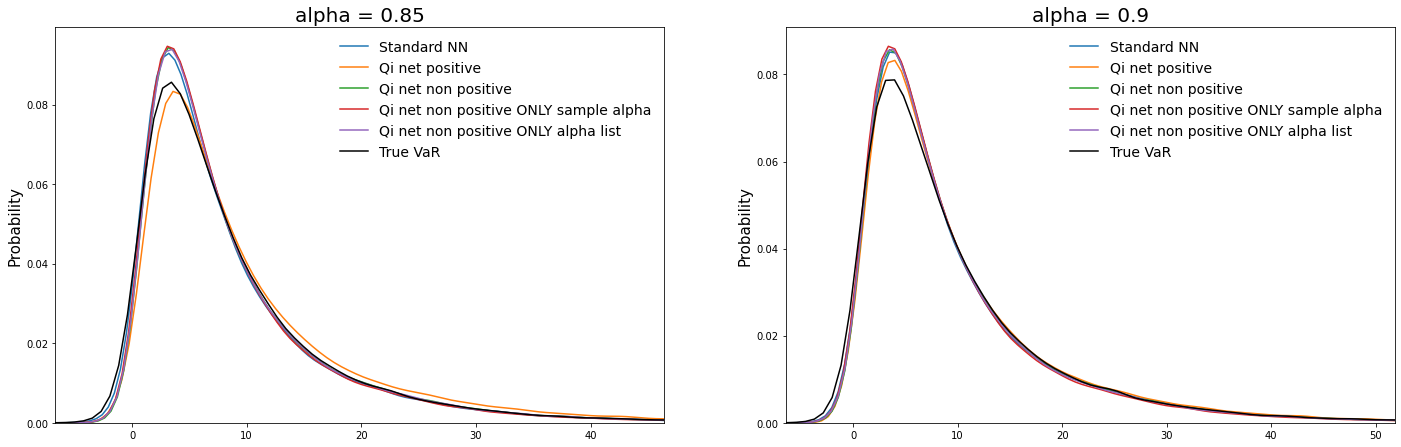

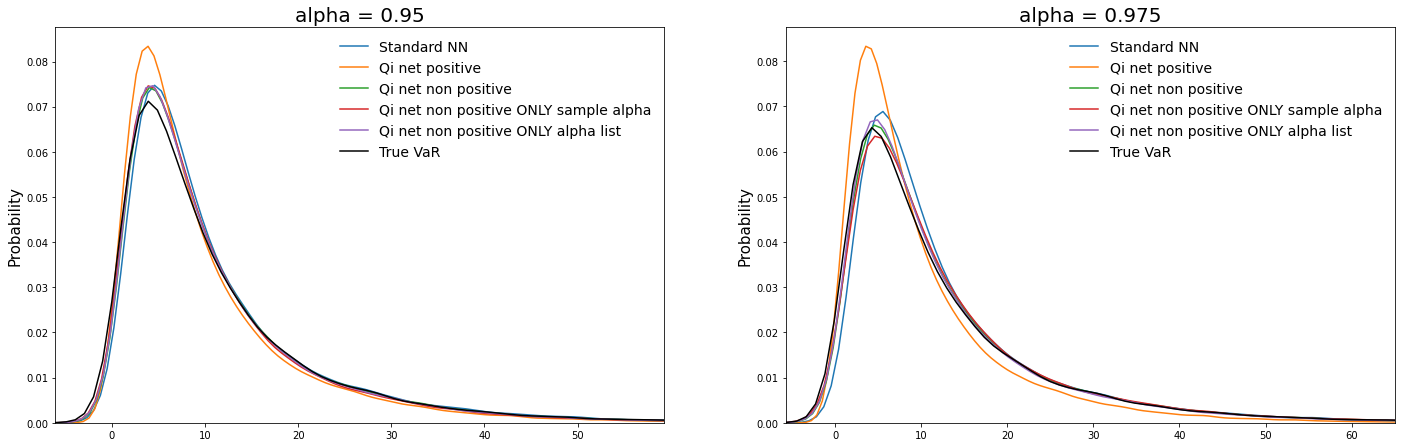

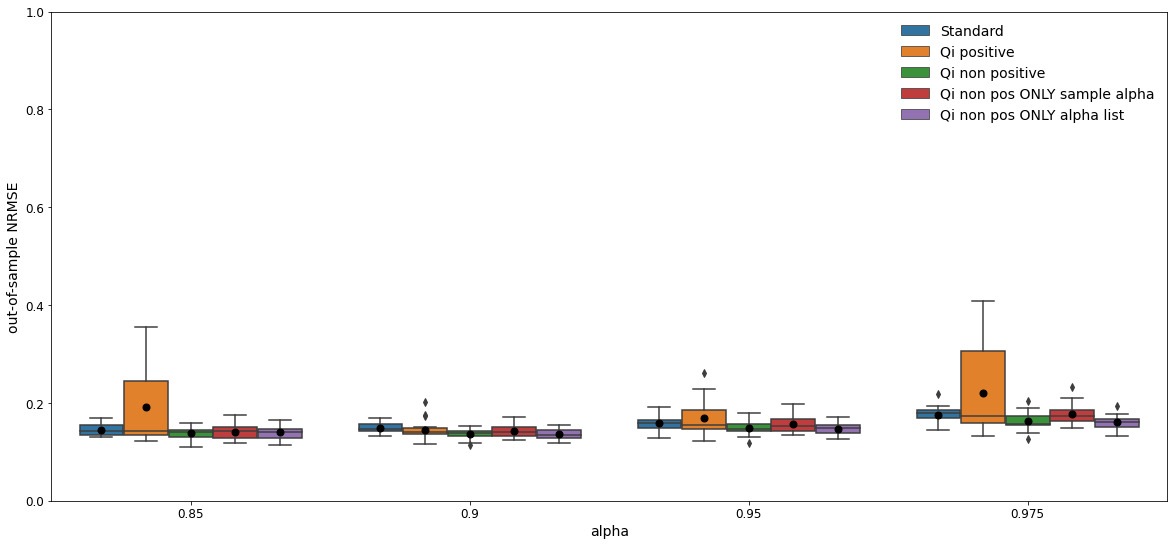

In [ ]:
boxplot_compa_func(trail = 20, alpha_l = [0.85, 0.9, 0.95, 0.975], dim_X = 10, lower = 0.8, upper = 1., propo_hunit=15)

###b. high dim_X (= 40) - high alpha (= [0.85, 0.9, 0.95, 0.975])

Empirical probability of true label being lower than true VaR (alpha) =  [0.851043701171875, 0.9004364013671875, 0.9505615234375, 0.975555419921875]
====== One hidden layer net ======
NRMSE in-sample VaR =  [0.2396923452615738, 0.2519000470638275, 0.2684973180294037, 0.2978755831718445]
NRMSE out-sample VaR =  [0.24288003146648407, 0.25386300683021545, 0.27112945914268494, 0.3005564212799072]
====== Qi net positive ======
NRMSE in-sample VaR =  [0.3390459418296814, 0.22139757871627808, 0.283786416053772, 0.40489688515663147]
NRMSE out-sample VaR =  [0.34354618191719055, 0.2261328101158142, 0.286198228597641, 0.4060874283313751]
====== Qi net non positive ======
NRMSE in-sample VaR =  [0.22225835919380188, 0.22257119417190552, 0.2346494048833847, 0.24732404947280884]
NRMSE out-sample VaR =  [0.2257183939218521, 0.22619205713272095, 0.23839539289474487, 0.2511155307292938]
====== Qi net non positive + only sample alpha======
NRMSE in-sample VaR =  [0.22199179232120514, 0.2390400767326355

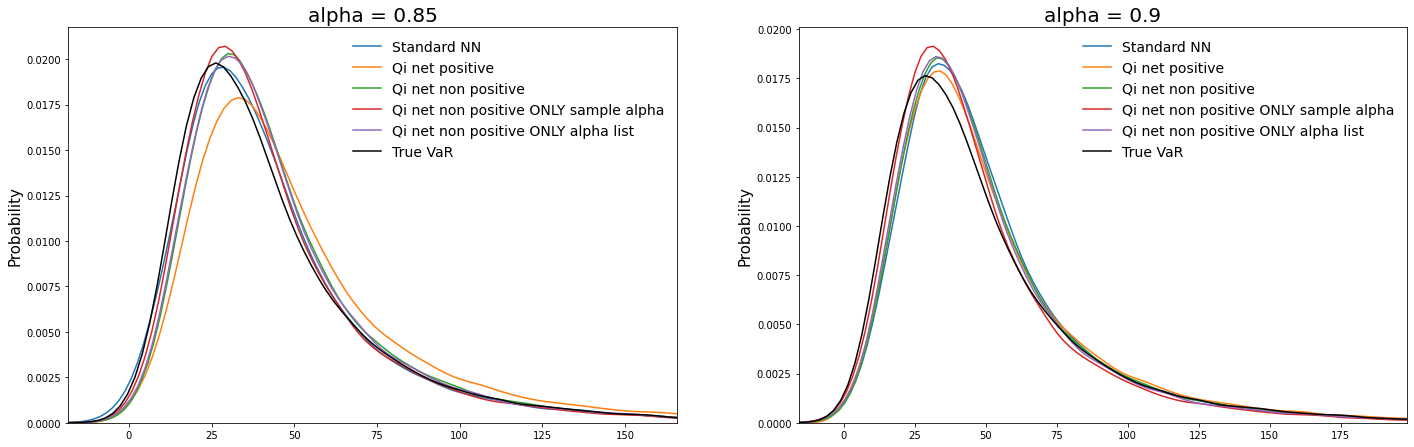

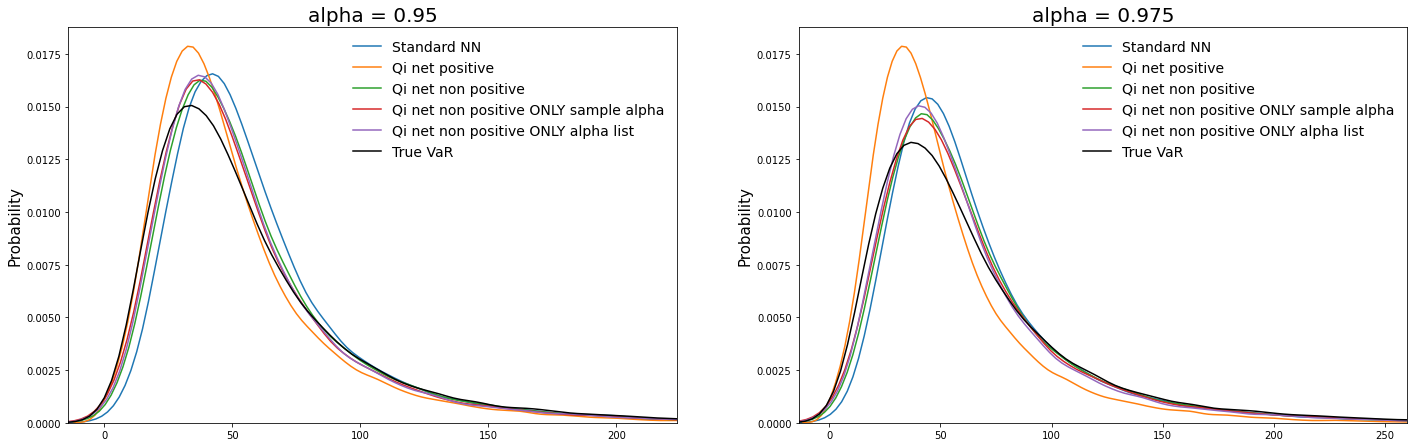

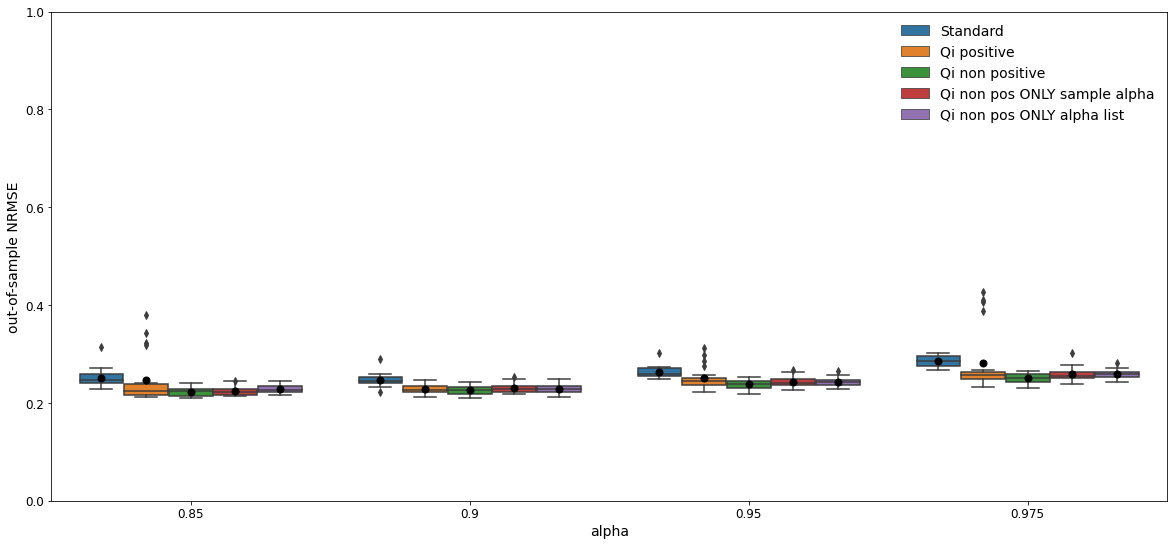

In [ ]:
boxplot_compa_func(trail = 20, alpha_l= [0.85, 0.9, 0.95, 0.975], dim_X = 40, lower = 0.8, upper = 1., NN_hunit = 5)

## 3. Visualizing the result of Standard networks and Quantile interpolation network (simple)

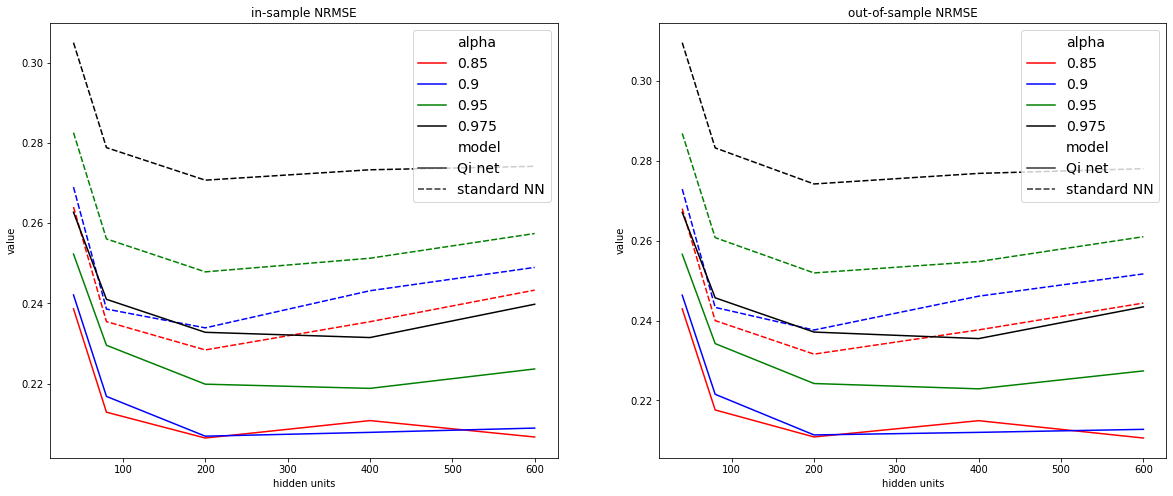

In [ ]:
Comparing the performance of Qi net and standard net in function of number of hidden units. These following curves are obtained using the mean of 10 trails

In [ ]:
The performance of 1 trial

0.850  ...     0.975
model                     set                            ...          
standard net              in-sample NRMSE      0.231965  ...  0.287446
                          out-of-sample NRMSE  0.233410  ...  0.288290
Qi net                    in-sample NRMSE      0.205121  ...  0.238986
                          out-of-sample NRMSE  0.205920  ...  0.239551
Qi net train sample alpha in-sample NRMSE      0.230830  ...  0.251070
                          out-of-sample NRMSE  0.232213  ...  0.251962
Qi net train list alpha   in-sample NRMSE      0.206745  ...  0.240407
                          out-of-sample NRMSE  0.207954  ...  0.242011

[8 rows x 4 columns]

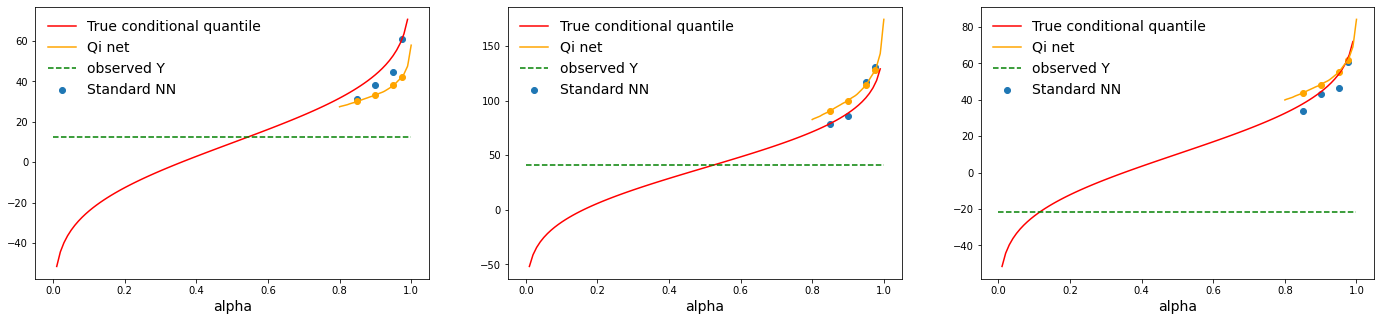

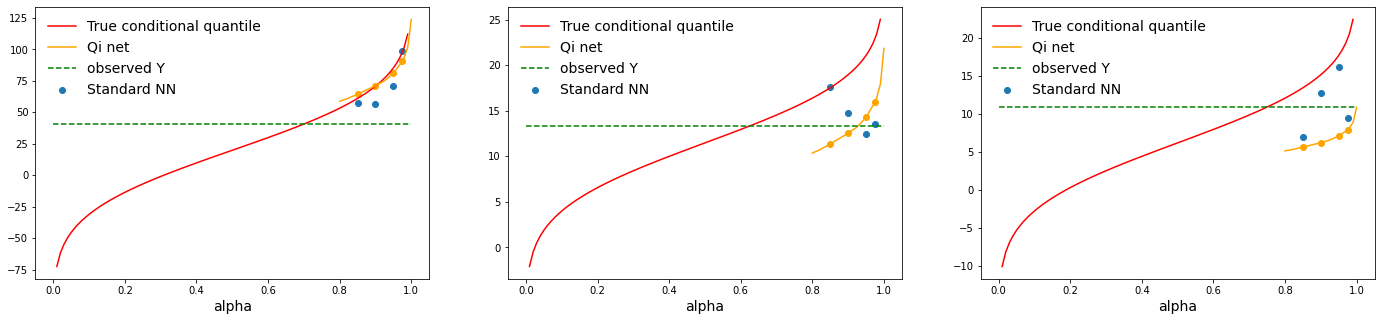

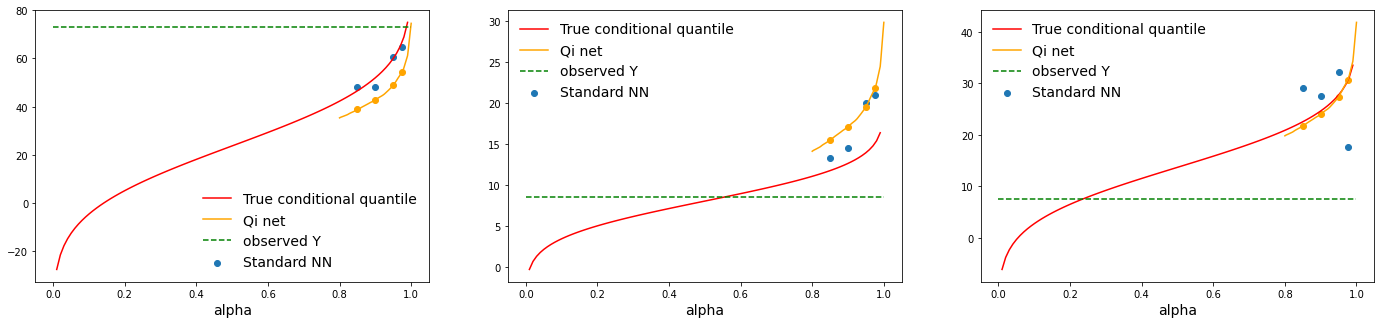

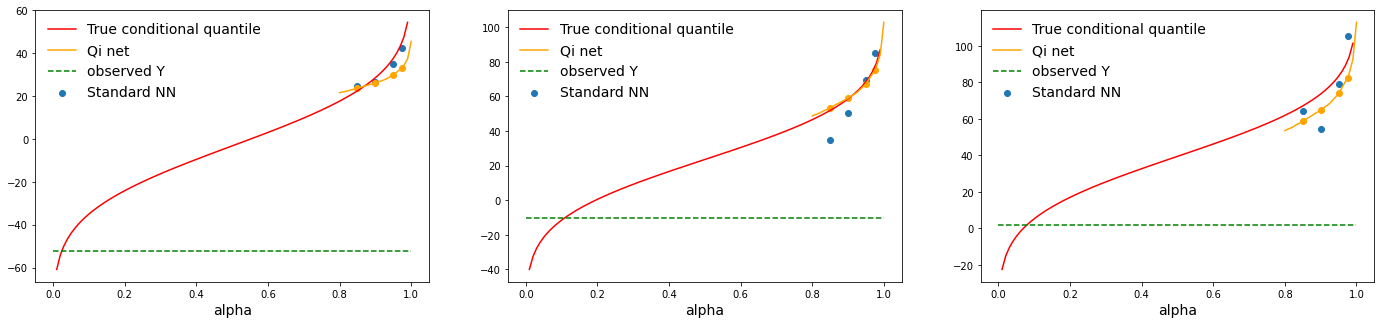

In [ ]:
Each following figure is conditioned by ONE observation of X

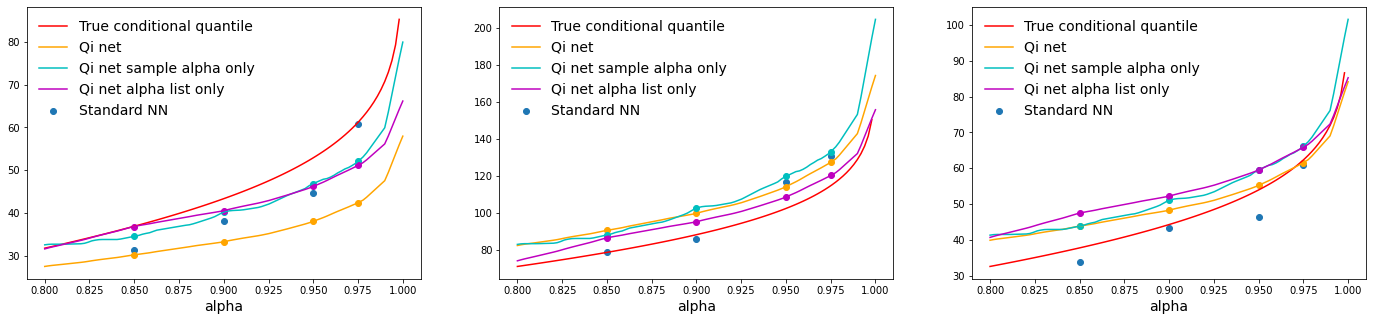

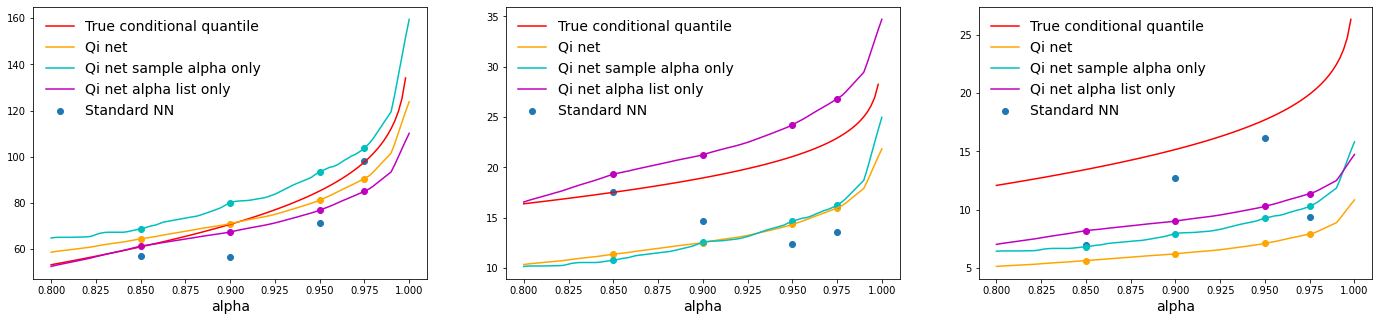

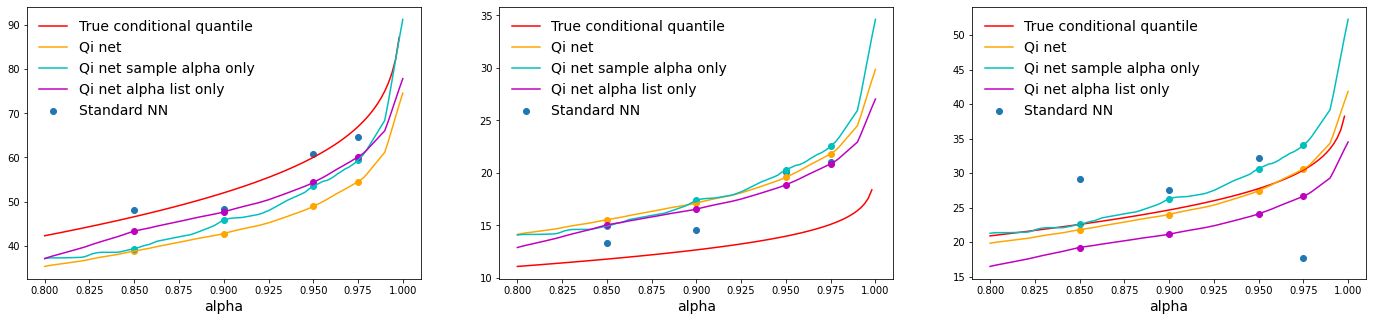

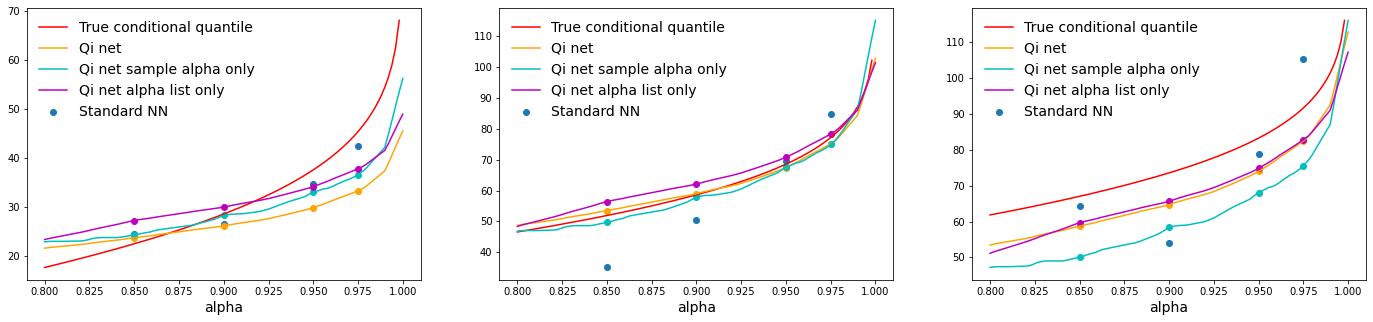

In [ ]:
Same as above figures but zoom in the focusing alpha region and add the result of other learning strategies of Qi net

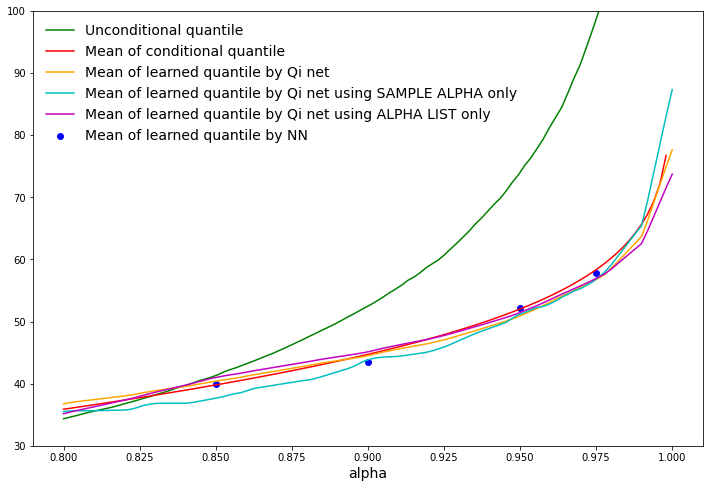

In [ ]:
Aggregating by mean the quantile estimates of all observations

## Visualizing the asymmetric learning difficulty between high and low quantiles

================== Standard net
E[Y|X] = 0.366x + 0.401x^2
Std[Y|X] = |0.754x + 0.038x^2|
+---------------------+----------+----------+-----------+-----------+
|                     |    0.025 |      0.1 |       0.9 |     0.975 |
|---------------------+----------+----------+-----------+-----------|
| in-sample NRMSE     | 0.231742 | 0.125356 | 0.0483463 | 0.0623471 |
| out-of-sample NRMSE | 0.227576 | 0.1251   | 0.0482084 | 0.0625041 |
+---------------------+----------+----------+-----------+-----------+


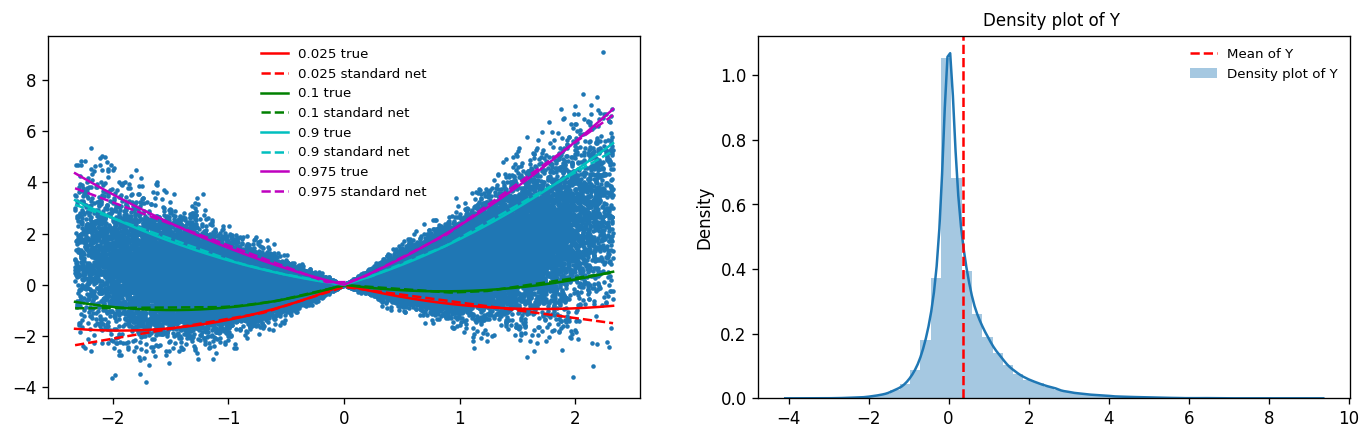

================== Standard net
E[Y|X] = 0.154x + -0.762x^2
Std[Y|X] = |0.743x + 0.262x^2|
+---------------------+-----------+-----------+-----------+----------+
|                     |     0.025 |       0.1 |       0.9 |    0.975 |
|---------------------+-----------+-----------+-----------+----------|
| in-sample NRMSE     | 0.0350177 | 0.0335582 | 0.0672319 | 0.102139 |
| out-of-sample NRMSE | 0.0350127 | 0.0332413 | 0.0677188 | 0.102126 |
+---------------------+-----------+-----------+-----------+----------+


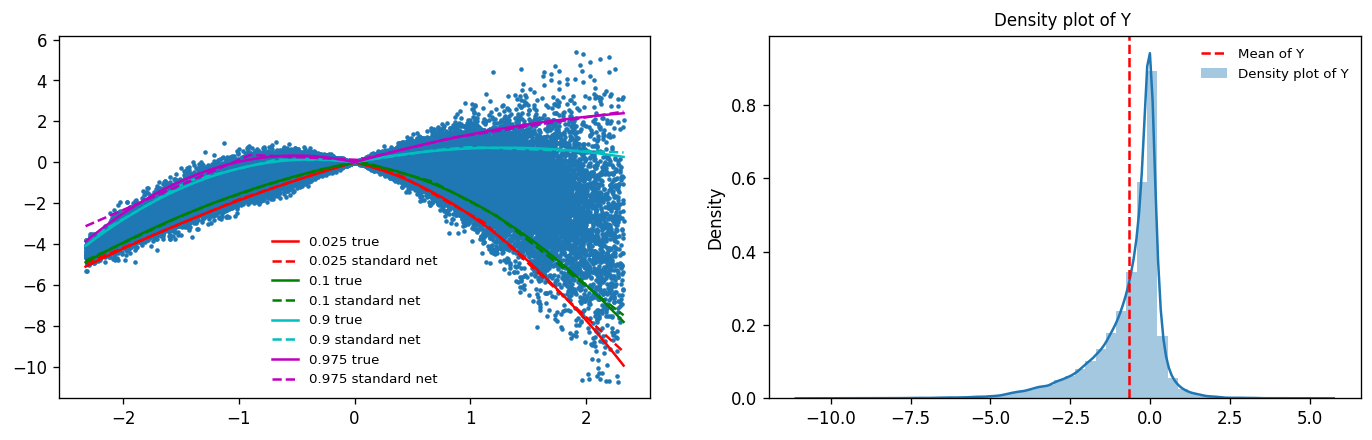

================== Standard net
E[Y|X] = -0.563x + -0.542x^2
Std[Y|X] = |-0.948x + 0.240x^2|
+---------------------+-----------+-----------+----------+-----------+
|                     |     0.025 |       0.1 |      0.9 |     0.975 |
|---------------------+-----------+-----------+----------+-----------|
| in-sample NRMSE     | 0.0592853 | 0.0955893 | 0.107074 | 0.0517055 |
| out-of-sample NRMSE | 0.0604699 | 0.0976938 | 0.108754 | 0.0512329 |
+---------------------+-----------+-----------+----------+-----------+


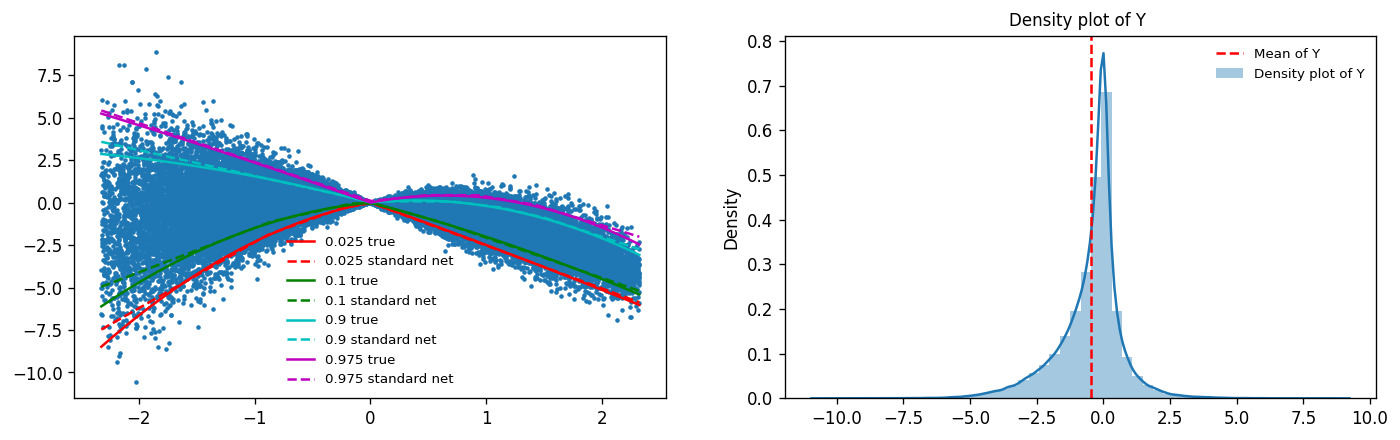

================== Standard net
E[Y|X] = -0.549x + -0.992x^2
Std[Y|X] = |0.217x + -0.111x^2|
+---------------------+-----------+-----------+-----------+----------+
|                     |     0.025 |       0.1 |       0.9 |    0.975 |
|---------------------+-----------+-----------+-----------+----------|
| in-sample NRMSE     | 0.0419228 | 0.0411894 | 0.0353162 | 0.115643 |
| out-of-sample NRMSE | 0.0426816 | 0.0419439 | 0.0365774 | 0.11533  |
+---------------------+-----------+-----------+-----------+----------+


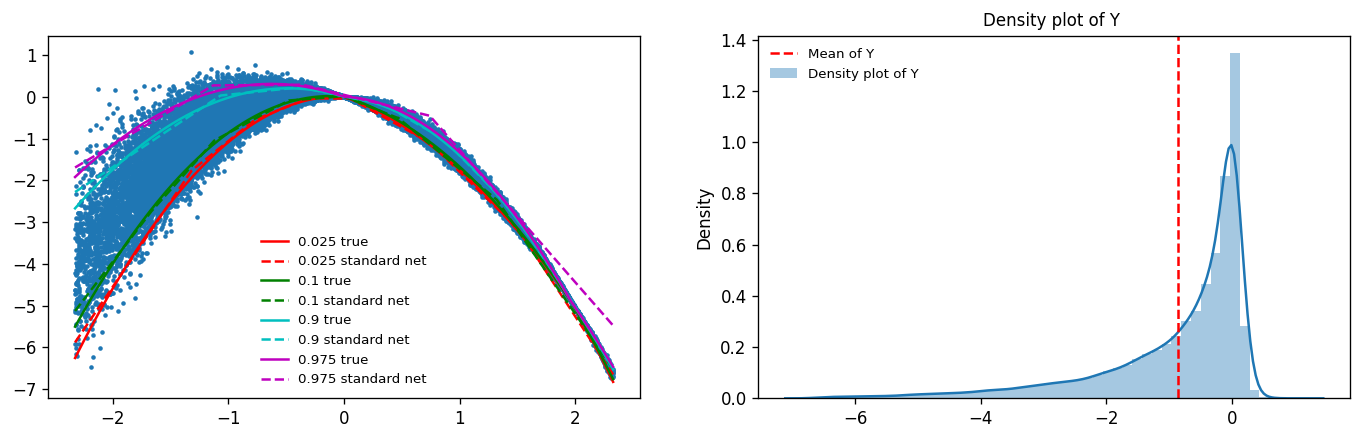

================== Standard net
E[Y|X] = -0.217x + 0.276x^2
Std[Y|X] = |-0.135x + -0.732x^2|
+---------------------+----------+-----------+-----------+-----------+
|                     |    0.025 |       0.1 |       0.9 |     0.975 |
|---------------------+----------+-----------+-----------+-----------|
| in-sample NRMSE     | 0.103732 | 0.0620495 | 0.0727934 | 0.065416  |
| out-of-sample NRMSE | 0.102695 | 0.062276  | 0.0732753 | 0.0657639 |
+---------------------+----------+-----------+-----------+-----------+


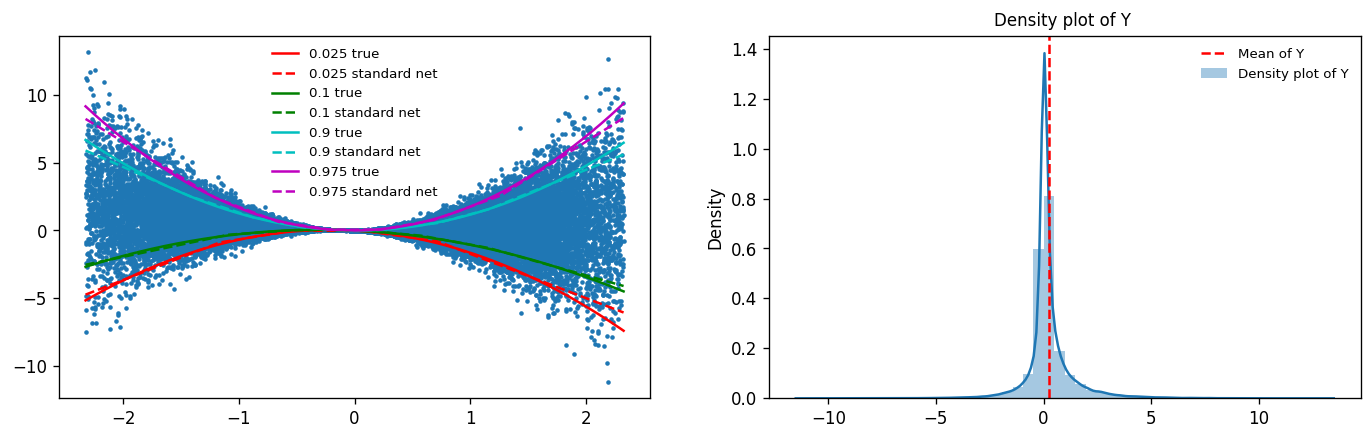

================== Standard net
E[Y|X] = -0.863x + 0.202x^2
Std[Y|X] = |-0.191x + -0.708x^2|
+---------------------+-----------+-----------+-----------+-----------+
|                     |     0.025 |       0.1 |       0.9 |     0.975 |
|---------------------+-----------+-----------+-----------+-----------|
| in-sample NRMSE     | 0.0516947 | 0.0688091 | 0.0842485 | 0.0598915 |
| out-of-sample NRMSE | 0.0518382 | 0.0687459 | 0.0841607 | 0.0599139 |
+---------------------+-----------+-----------+-----------+-----------+


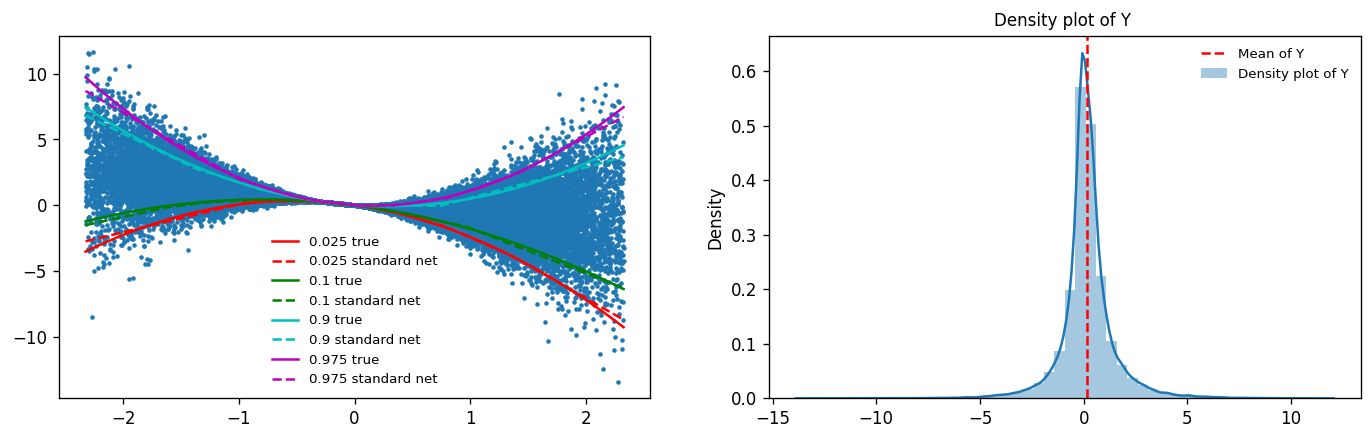

================== Standard net
E[Y|X] = 0.797x + -0.670x^2
Std[Y|X] = |0.196x + 0.042x^2|
+---------------------+-----------+-----------+-----------+-----------+
|                     |     0.025 |       0.1 |       0.9 |     0.975 |
|---------------------+-----------+-----------+-----------+-----------|
| in-sample NRMSE     | 0.0282656 | 0.0275044 | 0.0171576 | 0.0442796 |
| out-of-sample NRMSE | 0.027905  | 0.027684  | 0.0173452 | 0.0439977 |
+---------------------+-----------+-----------+-----------+-----------+


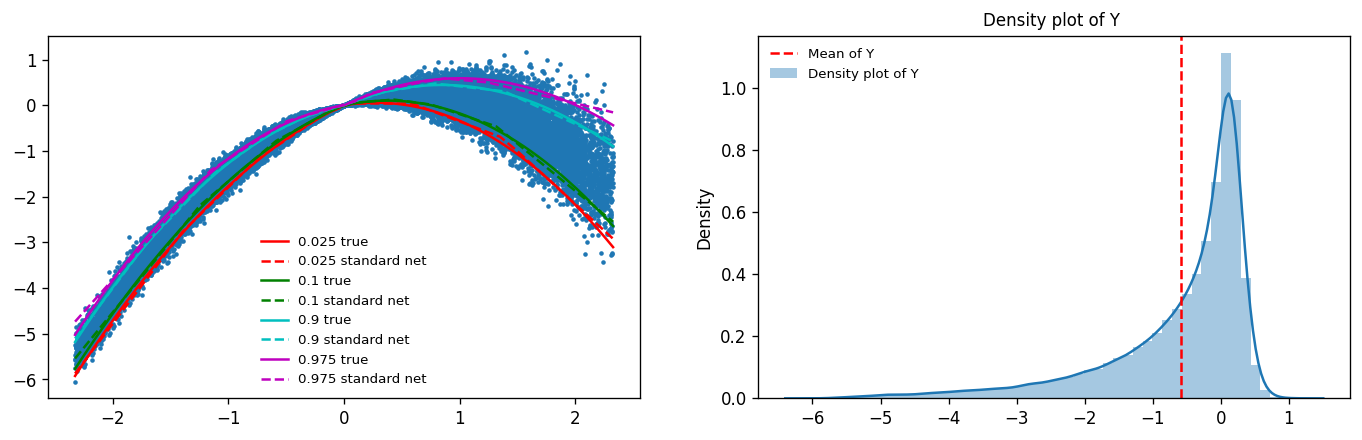

================== Standard net
E[Y|X] = 0.530x + -0.200x^2
Std[Y|X] = |-0.209x + -0.531x^2|
+---------------------+-----------+-----------+-----------+-----------+
|                     |     0.025 |       0.1 |       0.9 |     0.975 |
|---------------------+-----------+-----------+-----------+-----------|
| in-sample NRMSE     | 0.0588846 | 0.0701249 | 0.074076  | 0.0584426 |
| out-of-sample NRMSE | 0.0594405 | 0.0711262 | 0.0739952 | 0.0586537 |
+---------------------+-----------+-----------+-----------+-----------+


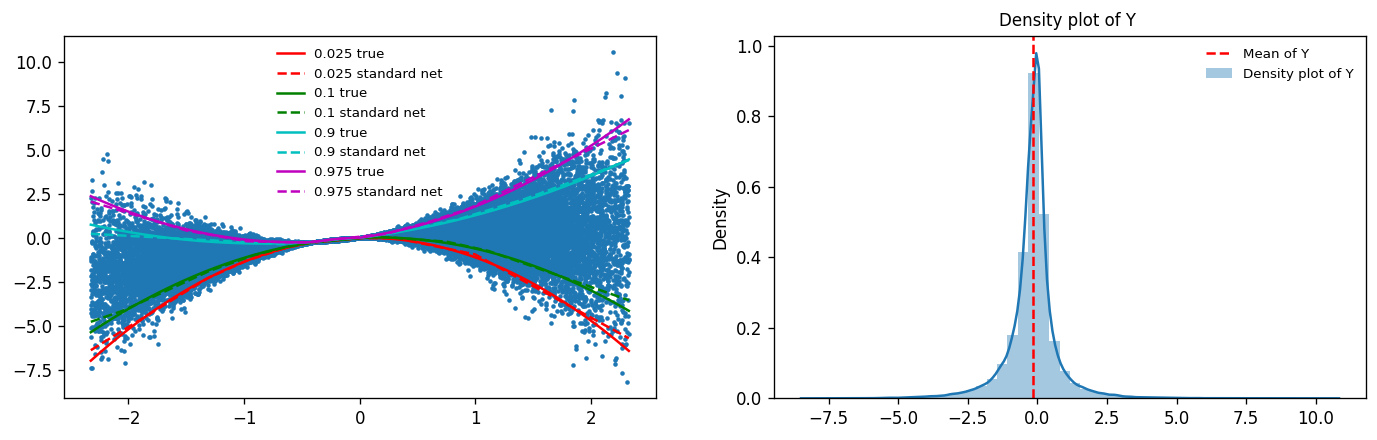

================== Standard net
E[Y|X] = 0.098x + -0.358x^2
Std[Y|X] = |0.659x + 0.806x^2|
+---------------------+----------+----------+----------+----------+
|                     |    0.025 |      0.1 |      0.9 |    0.975 |
|---------------------+----------+----------+----------+----------|
| in-sample NRMSE     | 0.098503 | 0.133187 | 0.2027   | 0.206984 |
| out-of-sample NRMSE | 0.098521 | 0.133728 | 0.200697 | 0.205997 |
+---------------------+----------+----------+----------+----------+


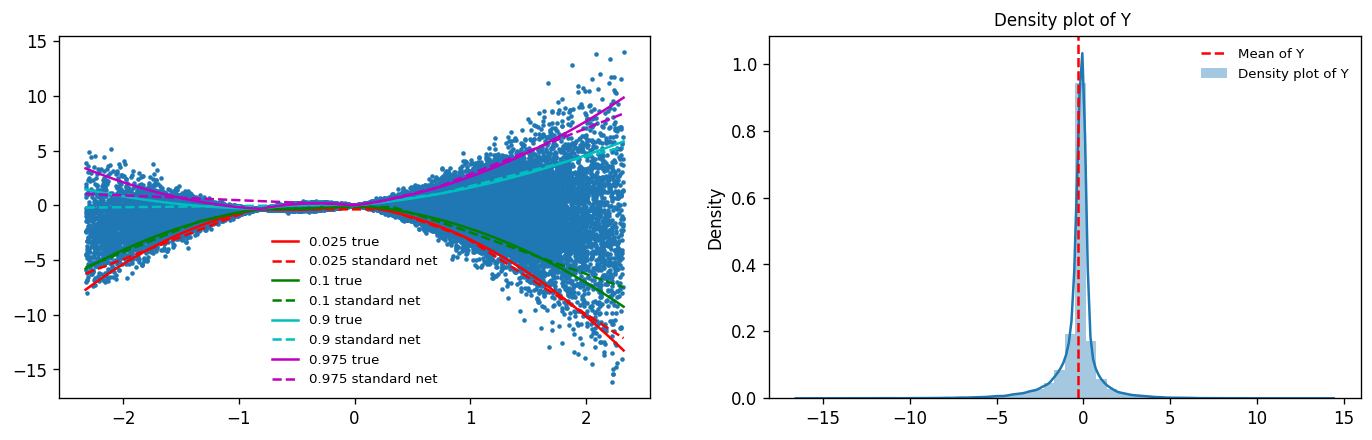

================== Standard net
E[Y|X] = 0.956x + -0.979x^2
Std[Y|X] = |0.134x + 0.041x^2|
+---------------------+-----------+-----------+-----------+----------+
|                     |     0.025 |       0.1 |       0.9 |    0.975 |
|---------------------+-----------+-----------+-----------+----------|
| in-sample NRMSE     | 0.0347755 | 0.0681433 | 0.0333392 | 0.167765 |
| out-of-sample NRMSE | 0.0348876 | 0.0682247 | 0.0336618 | 0.166812 |
+---------------------+-----------+-----------+-----------+----------+


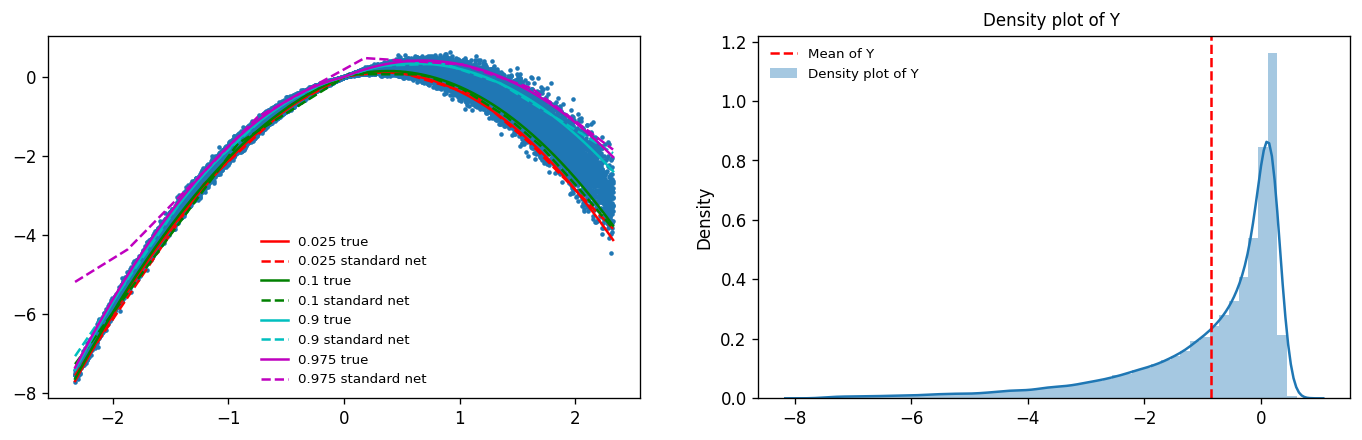

In [ ]:
asymmetric_visu(coef_high = 1., coef_low = -1.)